In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as nn

In [2]:
def reader(file_name):
    list_obj = list()
    with open(file_name, 'r') as fd_file:
        i = 0;
        for line in fd_file:
            line = line.split()
            coords = np.zeros(shape=(3,))
            coords[0] = float(line[0])
            coords[1] = float(line[1])
            coords[2] = float(line[2])
            i += 1
            list_obj.append(coords)            
    return np.array(list_obj)

In [57]:
mas = reader('r 0.05 0.075 xyz.txt')

In [58]:
mas.shape


(123930, 3)

In [59]:
nbrs = nn(n_neighbors=5, algorithm='ball_tree').fit(mas)

In [60]:
dist, ind = nbrs.kneighbors(mas)

In [339]:
tmp = dist_to_4[112000:113000]

In [346]:
tmp[tmp<10]

array([1.01312438, 1.57951557, 2.05695737, 1.69914177, 1.14775675,
       2.24133048, 2.12080587, 1.29689764, 1.16678124, 0.87648207,
       0.67581574, 1.11947857, 1.00277798, 0.88568118, 0.94504335,
       2.07242275, 1.90613436, 2.29189365, 1.79916232, 0.99833791,
       0.65191911, 1.06037491, 1.65332662, 2.09336035, 2.48072079,
       1.10215584, 2.46268115, 1.98397637, 2.29201267, 2.42310189,
       2.4680675 , 1.85718716, 2.5007627 , 1.89567305, 1.39723874,
       2.27182321, 3.42827149, 1.61606744, 3.98476194, 2.08430526,
       3.68638658, 1.80546323, 2.14265091, 4.20420823, 2.33687416,
       3.24708725, 2.21160107, 1.84845856, 2.42621629, 3.26570612,
       3.5620812 , 3.16134725, 2.32136308, 1.6850578 , 1.57342681,
       1.71484523, 1.75150478, 1.36798817, 1.5706869 , 1.53275322,
       1.9274565 , 1.79624287, 2.01931179, 2.26257759, 1.80489136,
       2.03697718, 1.45953137, 1.11680405, 1.18014314, 0.90822954,
       1.88762927, 1.41870412, 1.01508506, 0.97650372, 1.53001

In [62]:
dist_to_4 = dist[:,4]

In [188]:
dist_to_4.shape

(123930,)

In [199]:
tmp = dist_to_4[:1000]

In [64]:
dist_to_4[dist_to_4==0]

array([], dtype=float64)

In [312]:
dist_to_4[110000:110500]

array([ 2.43480512,  3.23437766,  1.38049532,  1.24985555,  1.7727536 ,
        1.87969161,  1.42817871,  1.15565925,  0.96026545,  1.65224552,
        1.42906015,  0.76615977,  0.90371883,  0.71271992,  0.9651388 ,
        2.27606743,  1.33280843,  2.77881623,  1.50192069,  1.18785832,
        0.9325992 ,  0.9325992 ,  0.89468942,  1.18244556,  1.39441003,
        2.78522252,  1.15937024,  1.31975603,  1.4293326 ,  1.59711785,
        1.31094767,  1.81730552,  2.27333978,  2.01000687,  2.57311791,
        0.69995306,  2.03826531,  1.84239966,  1.68872754,  1.6023731 ,
        1.59056685,  1.97178542,  1.79833703,  1.0096042 ,  1.78005835,
        1.69008377,  2.25038751,  2.15517606,  1.60230055,  2.19361212,
        2.43739468,  2.12279928,  2.88230445,  2.42403745,  2.82819954,
        3.36887887,  2.77334451,  2.30426307,  2.68337158,  2.7390302 ,
        2.56413573,  2.61011946,  2.69386686,  2.16910499,  1.71425099,
        2.46231345,  2.76904077,  1.80342583,  2.59351441,  1.06

In [351]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(tmp[tmp<8])

In [321]:
fit_alpha, fit_loc, fit_beta = stats.alpha.fit(dist_to_4)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [335]:
a, b, loc, scale = stats.beta.fit(dist_to_4[1000:110000], 3, 2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [336]:
print(a, b, loc, scale)

2.629346050744244 51.461029585626946 0.20091127867591513 35.26120105892832


In [352]:
print(fit_alpha, fit_loc, fit_beta)

3.036975762815633 0.3141446548017459 0.4407451047049222


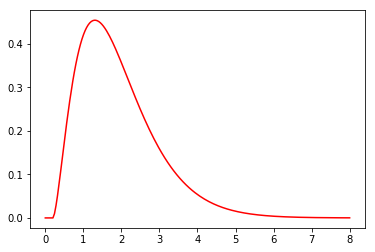

In [338]:
x = np.linspace(0, 8, 200)
pdf_fitted = stats.beta.pdf(x, a, b, loc, scale)
plt.plot(x, pdf_fitted, color='r')

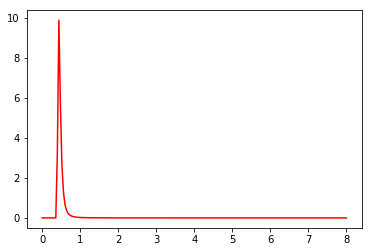

In [353]:

x = np.linspace(0, 8, 200)
pdf_fitted = stats.alpha.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)
plt.plot(x, pdf_fitted, color='r')


In [289]:
pdf_fitted[pdf_fitted<120]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 106.78259298,  94.26205731,  84.38915235,
        76.40264865,  69.80788916,  64.26943342,  59.55173346,
        55.48450442,  51.94157212,  48.82744987,  46.06853768,
        43.60718714,  41.39759911,  39.40292602,  37.59318522,
        35.94373028,  34.43411359,  33.04722804,  31.76865119,
        30.58613805,  29.48922484,  28.46891622,  27.51743623,
        26.62802828,  25.79479329,  25.01255774,  24.27676533,
        23.58338757,  22.92884939,  22.30996711,  21.72389618,
        21.16808725,  20.64024875,  20.13831509,  19.66

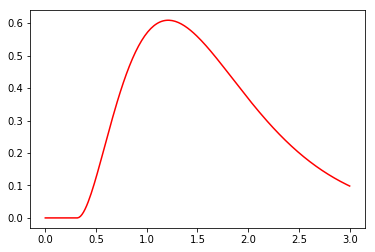

In [354]:
x = np.linspace(0, 3, 200)
pdf_fitted = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, pdf_fitted, color='r')

In [355]:
pdf_fitted


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.75278004e-05, 1.47629010e-03, 5.05450816e-03,
       1.05968153e-02, 1.79238525e-02, 2.68582115e-02, 3.72289340e-02,
       4.88732643e-02, 6.16373490e-02, 7.53764463e-02, 8.99548775e-02,
       1.05245834e-01, 1.21131104e-01, 1.37500745e-01, 1.54252743e-01,
       1.71292640e-01, 1.88533178e-01, 2.05893928e-01, 2.23300934e-01,
       2.40686365e-01, 2.57988173e-01, 2.75149765e-01, 2.92119690e-01,
       3.08851330e-01, 3.25302616e-01, 3.41435743e-01, 3.57216908e-01,
       3.72616059e-01, 3.87606647e-01, 4.02165403e-01, 4.16272118e-01,
       4.29909434e-01, 4.43062650e-01, 4.55719536e-01, 4.67870155e-01,
      

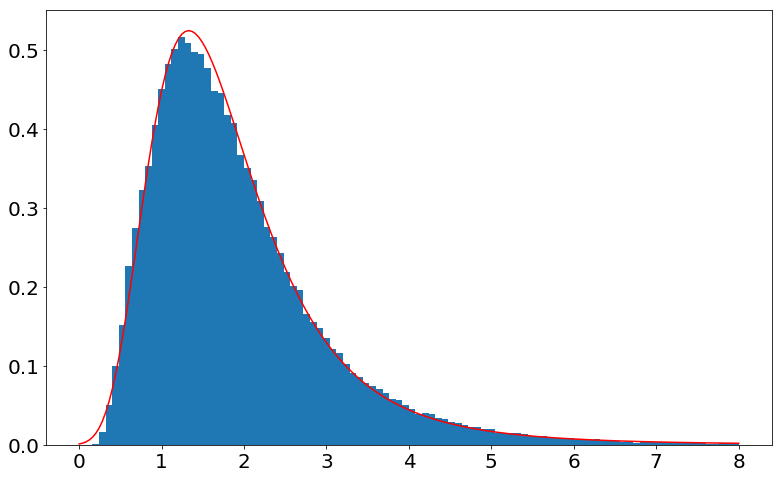

In [320]:
fig = plt.figure(figsize=(13, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

num = plt.hist(dist_to_4, 100, [0, 8], density=True)
plt.plot(x, pdf_fitted, color='r')

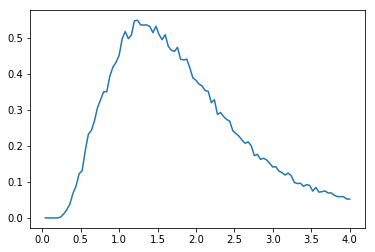

In [152]:
plt.plot(num[1][1:], num[0])

In [18]:
dist_not_zero = dist[dist!=0]

In [27]:
dist_not_zero[]

array([0.01956224, 0.02521089, 0.02551765, ..., 1.09694955, 1.20579458,
       1.39562228])

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  442.,  365.,
         447.,  411.,  382.,  430.,  438.,  445.,  488.,  490.,  469.,
         482.,  512.,  533.,  514.,  536.,  635.,  572.,  542.,  607.,
         649.,  674.,  677.,  665.,  608.,  698.,  621.,  669.,  760.,
         758.,  758.,  730.,  755.,  813.,  783.,  781.,  847.,  856.,
         911.,  832.,  855.,  787.,  904.,  913.,  856.,  947., 1024.,
         933.,  965.,  971.,  951.,  994., 1002., 1016., 1109., 1037.,
        1055., 1107., 1163., 1040., 1073., 1123., 1105., 1163., 1084.,
        1119., 1147., 1204., 1172., 1220., 1276., 1136., 1232., 1105.,
        1142., 1217., 1312., 1193., 1172., 1183., 1142., 1269., 1223.,
        1209., 1142., 1332., 1202., 1237., 1271., 1253., 1304., 1205.,
        1183., 1256., 1228., 1289., 1230., 1328., 1205., 1265., 1319.,
      

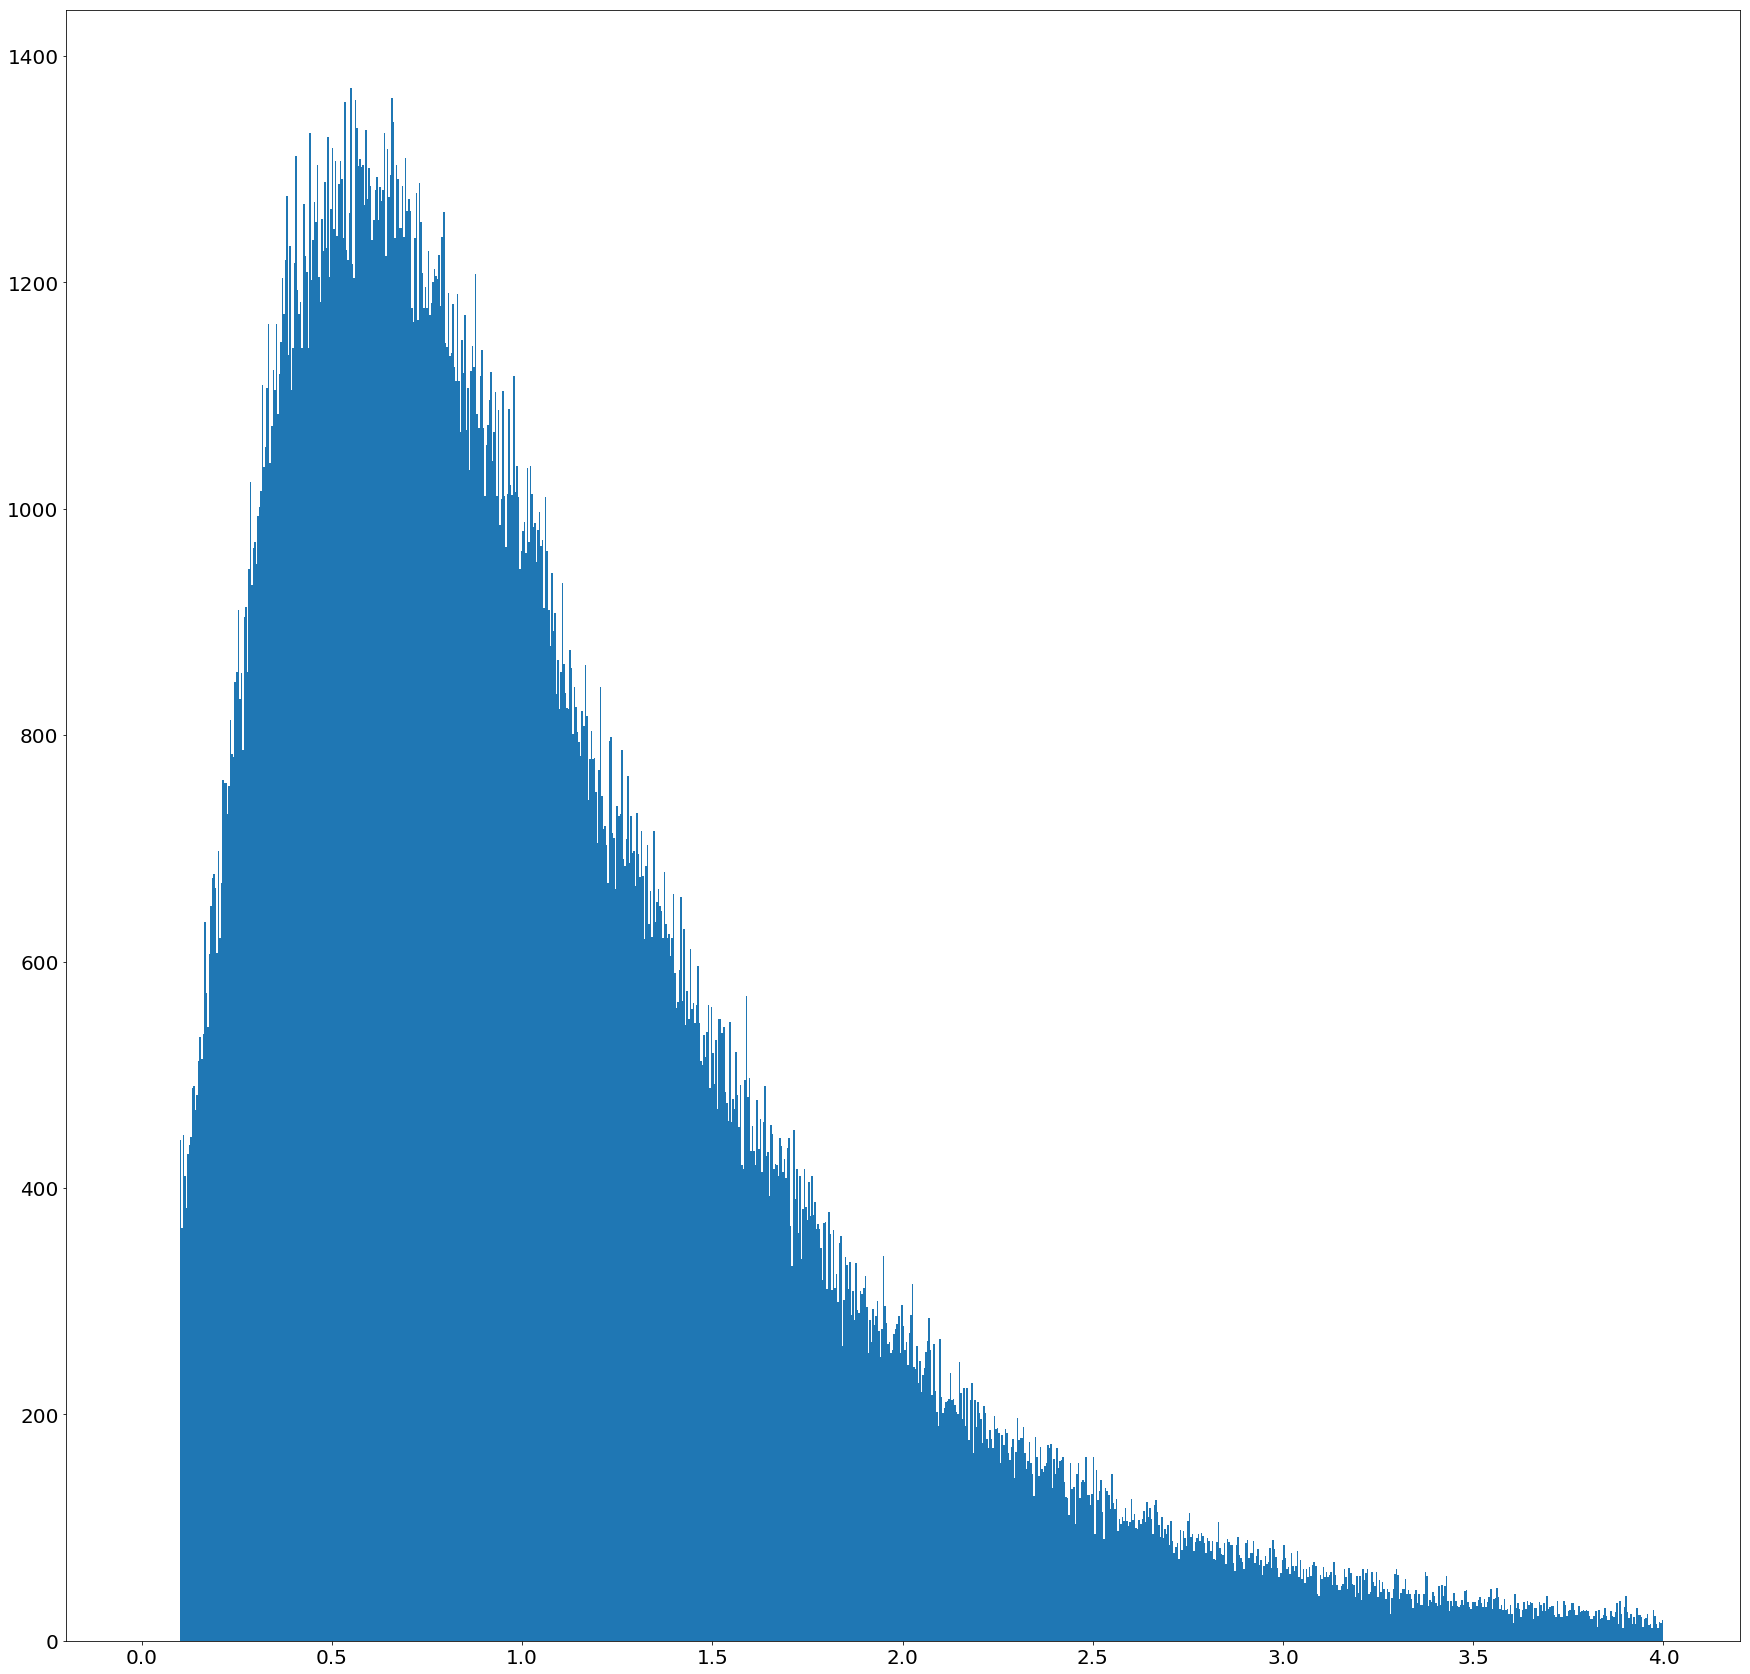

In [44]:

fig = plt.figure(figsize=(30, 30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.hist(dist_not_zero[dist_not_zero > 0.1], 1000, range=[0, 4])

(array([ 9462., 14291., 18822., 22662., 24019., 24905., 25036., 24778.,
        23462., 22103., 20708., 19702., 17875., 15850., 14339., 13401.,
        12145., 10710.,  9609.,  8893.,  7923.,  7186.,  6149.,  5533.,
         5146.,  4523.,  4027.,  3533.,  3240.,  2965.,  2648.,  2282.,
         2161.,  1777.,  1725.,  1547.,  1446.,  1267.,  1135.,  1007.,
          928.,   834.,   758.,   675.,   638.,   574.,   557.,   452.,
          464.,   362.]),
 array([0.1  , 0.178, 0.256, 0.334, 0.412, 0.49 , 0.568, 0.646, 0.724,
        0.802, 0.88 , 0.958, 1.036, 1.114, 1.192, 1.27 , 1.348, 1.426,
        1.504, 1.582, 1.66 , 1.738, 1.816, 1.894, 1.972, 2.05 , 2.128,
        2.206, 2.284, 2.362, 2.44 , 2.518, 2.596, 2.674, 2.752, 2.83 ,
        2.908, 2.986, 3.064, 3.142, 3.22 , 3.298, 3.376, 3.454, 3.532,
        3.61 , 3.688, 3.766, 3.844, 3.922, 4.   ]),
 <a list of 50 Patch objects>)

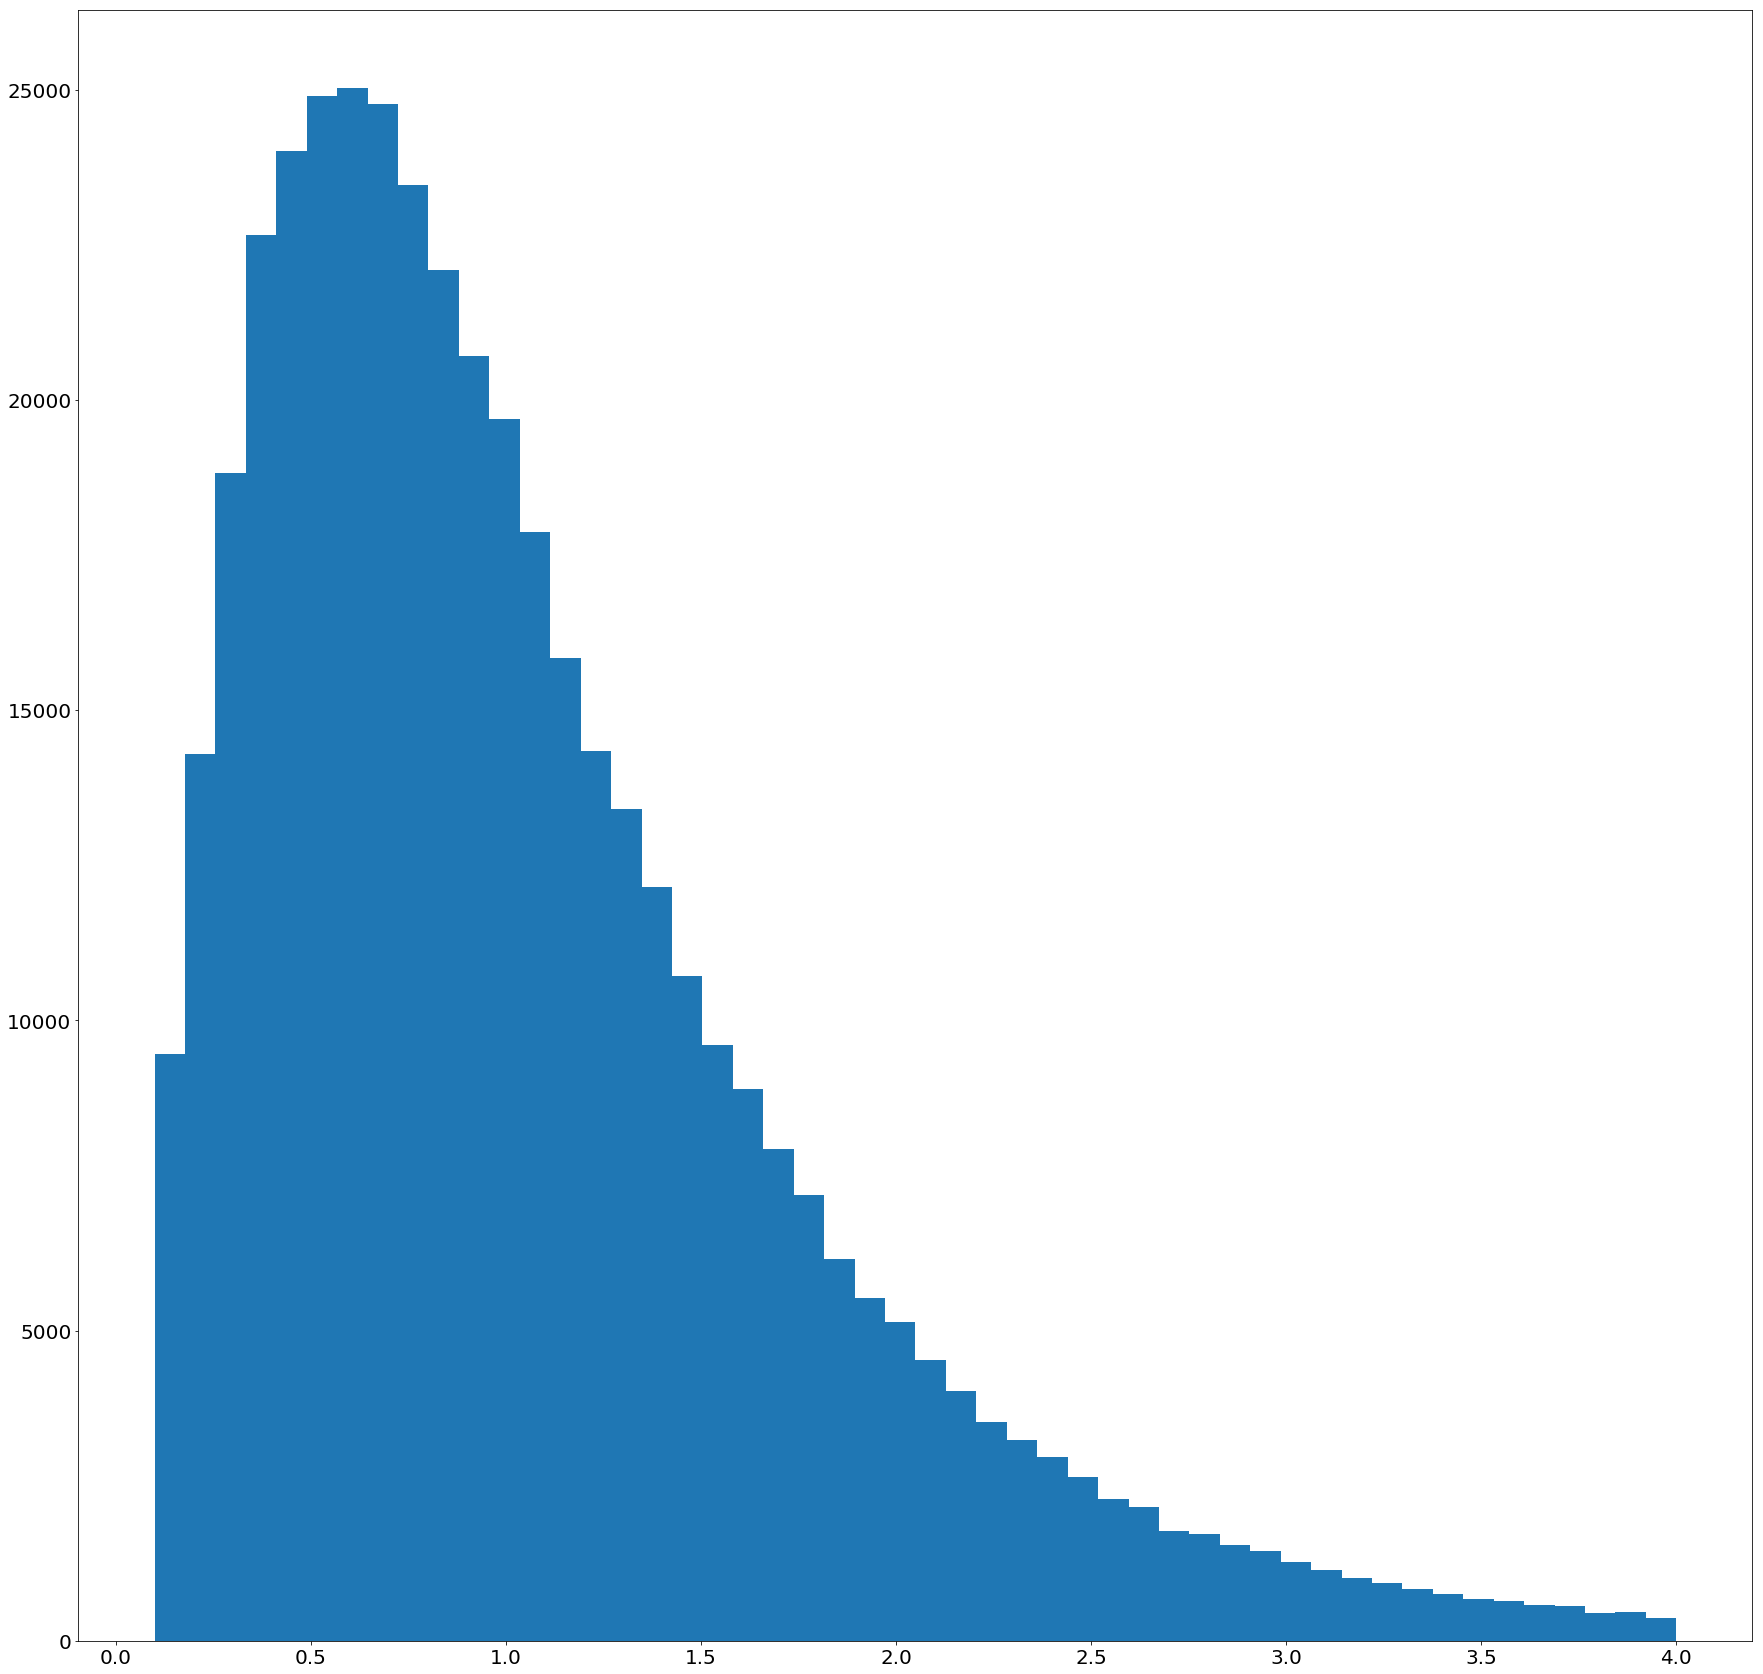

In [39]:

fig = plt.figure(figsize=(30, 30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.hist(dist_not_zero, 50, range=[0.1, 4])